In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from scipy.stats import chi2_contingency
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd


In [18]:
mh_df = pd.read_csv('/content/Mental Health Dataset/mental_health_dataset.csv')
mh_df.head(5)

,age,gender,employment_status,work_environment,mental_health_history,seeks_treatment,stress_level,sleep_hours,physical_activity_days,depression_score,anxiety_score,social_support_score,productivity_score,mental_health_risk
0,56,Male,Employed,On-site,Yes,Yes,6,6.2,3,28,17,54,59.7,High
1,46,Female,Student,On-site,No,Yes,10,9.0,4,30,11,85,54.9,High
2,32,Female,Employed,On-site,Yes,No,7,7.7,2,24,7,62,61.3,Medium
3,60,Non-binary,Self-employed,On-site,No,No,4,4.5,4,6,0,95,97.0,Low
4,25,Female,Self-employed,On-site,Yes,Yes,3,5.4,0,24,12,70,69.0,High


# **Pearson Correlation**

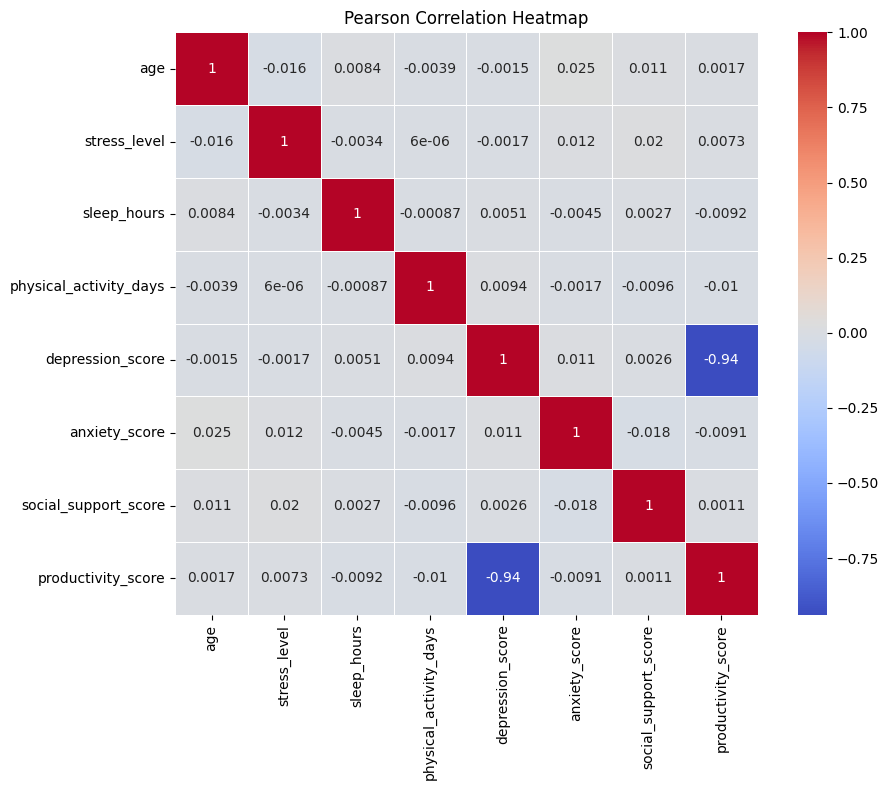

Depression Score vs Productivity Score: r = -0.939, p = 0.0000
Age vs Social Support Score: r = 0.011, p = 0.2657
Stress Level vs Social Support Score: r = 0.020, p = 0.0480
Anxiety Score vs Social Support Score: r = -0.018, p = 0.0645


In [24]:
# List of continuous variables
continuous_vars = [
    'age', 'stress_level', 'sleep_hours', 'physical_activity_days',
    'depression_score', 'anxiety_score', 'social_support_score', 'productivity_score'
]

# Pearson correlation matrix computation
correlation_matrix = mh_df[continuous_vars].corr(method='pearson')

# Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True, linewidths=0.5)
plt.title('Pearson Correlation Heatmap')
plt.tight_layout()
plt.savefig("pearson_correlation_heatmap.png")
plt.show()

corr, p = pearsonr(mh_df['depression_score'], mh_df['productivity_score'])
print(f"Depression Score vs Productivity Score: r = {corr:.3f}, p = {p:.4f}")

corr, p = pearsonr(mh_df['age'], mh_df['social_support_score'])
print(f"Age vs Social Support Score: r = {corr:.3f}, p = {p:.4f}")

corr, p = pearsonr(mh_df['stress_level'], mh_df['social_support_score'])
print(f"Stress Level vs Social Support Score: r = {corr:.3f}, p = {p:.4f}")

corr, p = pearsonr(mh_df['anxiety_score'], mh_df['social_support_score'])
print(f"Anxiety Score vs Social Support Score: r = {corr:.3f}, p = {p:.4f}")


## Observation

### **depression_score and productivity_score**

> The Pearson correlation coefficient (r) was r = -0.939, indicating a strong, negative linear relationship.
>
> The p-value was p = <0.0001, which suggests the correlation is statistically significant.
>
> This means that as depression_score increases, preductivity_score tends to decrease.


### **ALL other variables**

> The correlation of all other variable pairs were r < 0.05, and p>0.05 suggesting that there was no statistically significant correlation and hence, no linear relationship.
>
> This implies that as one variable increases, the other remains unaffected.



## Overall Insight (Matrix Observation)

> Findings from this result show that depression and productivity are highly negatively correlated. This suggest the role depression may play in productivity in the work place. However, as correlation does not imply causation, a simple linear regression analysis is recommended to predict causation.


# **Chi-Square Test of Independence**

In [20]:
# Defining a helper function to run Chi-square and print results
def run_chi_square(var1, var2):
    print(f"\nChi-Square Test: {var1} vs {var2}")
    table = pd.crosstab(mh_df[var1], mh_df[var2])
    chi2, p, dof, expected = chi2_contingency(table)
    print("Contingency Table:")
    print(table)
    print(f"Chi2 = {chi2:.4f}, p = {p:.4f}, dof = {dof}")
    print("Expected Frequencies:")
    print(pd.DataFrame(expected, index=table.index, columns=table.columns))
    if p < 0.05:
        print("→ There is a statistically significant association.")
    else:
        print("→ No statistically significant association.")

# Running Chi-square for each bivariate pair
run_chi_square('work_environment', 'seeks_treatment')
run_chi_square('work_environment', 'mental_health_risk')
run_chi_square('employment_status', 'seeks_treatment')
run_chi_square('employment_status', 'mental_health_risk')



Chi-Square Test: work_environment vs seeks_treatment
Contingency Table:
seeks_treatment     No   Yes
work_environment            
Hybrid            1171   776
On-site           3046  1998
Remote            1795  1214
Chi2 = 0.4243, p = 0.8088, dof = 2
Expected Frequencies:
seeks_treatment          No        Yes
work_environment                      
Hybrid            1170.5364   776.4636
On-site           3032.4528  2011.5472
Remote            1809.0108  1199.9892
→ No statistically significant association.

Chi-Square Test: work_environment vs mental_health_risk
Contingency Table:
mental_health_risk  High  Low  Medium
work_environment                     
Hybrid               477  332    1138
On-site             1143  906    2995
Remote               749  501    1759
Chi2 = 7.0153, p = 0.1351, dof = 4
Expected Frequencies:
mental_health_risk       High       Low     Medium
work_environment                                  
Hybrid               461.2443  338.5833  1147.1724
On-site   

## Observation

### **Variables**
1. *work_environment vs seeks_treatment*
2. *work_environment vs mental_health_risk*
3. *employment_status vs seeks_treatment*
4. *employment_status vs mental_health_risk*

> Results of the chi square test reveal that there was no statistically significant association between variables.
>
> This implies that individuals’ likelihood of being at risk for developing mental health issues or seeking treatment is **NOT** dependent on their work environment or employment status.


## General Insight

>  As no statistically significant association was observed, one could infere that the likelihood of an employee ***developing mental health issues*** or ***seeking treatment*** for their mental health troubles is **NOT** dependent on- or influenced by their ***work environment*** or ***employment status***.

# **One Way ANOVA**

In [21]:
# Defining categorical and continuous variables
categorical_vars = ['employment_status', 'work_environment', 'seeks_treatment']
continuous_vars = [
    'stress_level', 'sleep_hours', 'physical_activity_days',
    'depression_score', 'anxiety_score', 'social_support_score', 'productivity_score'
]

# ANOVA for each pair
for cat in categorical_vars:
    for cont in continuous_vars:
        # Group data by the categorical variable
        groups = [group[cont].dropna() for name, group in mh_df.groupby(cat)]
        # Perform one-way ANOVA
        f_stat, p_value = f_oneway(*groups)
        print(f"ANOVA: {cat} vs {cont}")
        print(f"F-statistic = {f_stat:.4f}, p-value = {p_value:.4f}")
        if p_value < 0.05:
            print("→ Statistically significant difference in means between groups.")
        else:
            print("→ No statistically significant difference.\n")


ANOVA: employment_status vs stress_level
F-statistic = 0.8252, p-value = 0.4798
→ No statistically significant difference.

ANOVA: employment_status vs sleep_hours
F-statistic = 1.6756, p-value = 0.1699
→ No statistically significant difference.

ANOVA: employment_status vs physical_activity_days
F-statistic = 0.3907, p-value = 0.7597
→ No statistically significant difference.

ANOVA: employment_status vs depression_score
F-statistic = 0.4463, p-value = 0.7199
→ No statistically significant difference.

ANOVA: employment_status vs anxiety_score
F-statistic = 0.6954, p-value = 0.5547
→ No statistically significant difference.

ANOVA: employment_status vs social_support_score
F-statistic = 0.3392, p-value = 0.7970
→ No statistically significant difference.

ANOVA: employment_status vs productivity_score
F-statistic = 0.6153, p-value = 0.6050
→ No statistically significant difference.

ANOVA: work_environment vs stress_level
F-statistic = 0.1398, p-value = 0.8695
→ No statistically signif

## **Follow Up Post Hoc Test**
*work_environment vs anxiety_score*

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
 group1  group2 meandiff p-adj   lower  upper  reject
-----------------------------------------------------
 Hybrid On-site  -0.3464 0.0997 -0.7417 0.0489  False
 Hybrid  Remote   0.0256 0.9894 -0.4053 0.4565  False
On-site  Remote    0.372 0.0287  0.0307 0.7132   True
-----------------------------------------------------


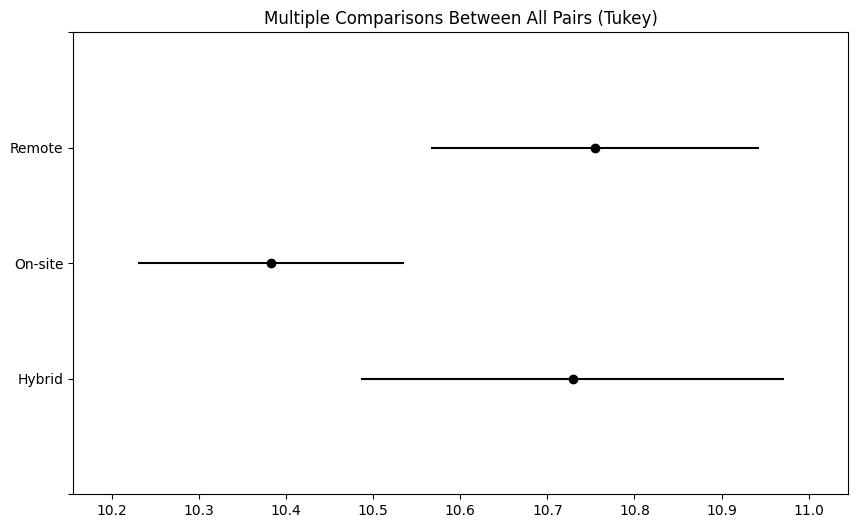

In [26]:
# Drop rows with missing values for selected variables
df_filtered = mh_df[['work_environment', 'anxiety_score']].dropna()

# Run Tukey’s HSD test
tukey = pairwise_tukeyhsd(
    endog=df_filtered['anxiety_score'],        # Dependent variable
    groups=df_filtered['work_environment'],    # Grouping (categorical) variable
    alpha=0.05                                 # Significance level
)

# Print the summary
print(tukey.summary())

tukey.plot_simultaneous()
plt.savefig("tukeys_postHoc_anxietyScores.png")

## Observation

### **work_environment vs anxiety_score**

> The one-way ANOVA returned F-statistic = 4.1076, p-value = 0.0165
>
> Since the p-value is less than 0.05, the difference in group means is statistically significant.
>
> This suggests that the variable, ***anxiety_score***, is influenced by group differences in the variable, ***work_environment***.


### **Tukey's HSD Result**

> The result from the tukeys HSD test indicate that **anxiety level/score** in employees working **remotely** is significantly ***greater*** than that of those working **on-site**.

## General Insight

> This finding suggests that the remote work setting may be associated with increased psychological strain, potentially due to factors such as social isolation, blurred work-life boundaries, lack of structure, or reduced access to in-person support systems.

